UNIVERSIDADE DE FORTALEZA-UNIFOR 

PÓS GRADUAÇÃO - TECNOLOGIA 

MBA EM CIÊNCIA DE DADOS 

Prof. PhD Ernerson A. Oliveira 

Aluno: Alessandro Lomônaco

Mat.: 1924522/5

### RELATÓRIO DE ANÁLISE DOS TWITTERS DO PRES. JAIR BOLSONARO

In [1]:
#Importando os módulos (bibliotecas)
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS

In [3]:
#Importando DS Jair
dsj = pd.read_json("jairbolsonaro.json")

In [29]:
#Carregando Data Set das 'STOP WORDS'
sw = pd.read_csv('stopwords.txt', header = None, names=['Palavra'])

In [23]:
#Verificando o dsj com as 5 primeiras linhas
dsj.head(5)
#sw.head(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN
3,2018-10-09 02:52:56+00:00,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",0.0,NaN,NaN,NaN,NaN
4,2017-08-23 15:12:48+00:00,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#Verificando o dsj com as 5 primeiras e as 5 últimas linhas
dsj.head(5)
dsj.full_text


0       EM "DITADURA" SEM PAREDÃO, ATÉ CHICO ALENCAR É...
1       Bom dia! 🇧🇷 #tbt com o amigo "Canguru", que já...
2       - Para descontrair. Proibido queimar ovo. (Kkk...
3       Trecho de entrevista ao vivo para o Jornal Nac...
4       Querem criar o fundão bilionário na Reforma Po...
                              ...                        
6789    Menos burocratização e gastos ao brasileiro: a...
6790    A @RevistaEpoca mente DESCARADAMENTE a meu res...
6791    Foi realizada hoje a Cerimônia de Posse dos Pr...
6792    - O Estatuto do Desarmamento ainda está em vig...
6793    Discurso d @FlavioBolsonaro sobre maioridade p...
Name: full_text, Length: 6794, dtype: object

In [31]:
Palavras_N = sw['Palavra'].str.lower().str.split()
type(Palavras_N)

pandas.core.series.Series

In [137]:
Palavras_jair = dsj['full_text'].str.lower().str.split()

In [114]:
#Criando dicionário

dictj = dict()

for Frases in Palavras_jair:
    for Palavras in Frases:
            if Palavras in dictj:
                dictj[Palavras] = dictj[Palavras] + 1
            else: 
                dictj[Palavras] = 1


#for key in list(dictj.keys()): 
#    print(key, ":", dictj[key]) 


In [115]:
pdj = pd.DataFrame(dictj.items(), columns=['Palavra', 'QTD'])

In [116]:
#Removendo Stop Words
npdj = pdj[~pdj.Palavra.isin(sw.Palavra.values)] 

In [117]:
npdj.sort_values(['QTD'],ascending=False).head(10)

,Palavra,QTD
279,Brasil,587
411,Bolsonaro,385
410,Jair,244
251,Obrigado,222
409,contra,183
214,grande,181
38,abraço,160
1163,PT,155
1643,Bolsonaro.,147
627,Presidente,143


In [118]:
pdj[pdj['Palavra'] == 'Lula']

,Palavra,QTD
1220,Lula,47


In [119]:
npdj

,Palavra,QTD
1,"""DITADURA""",1
2,SEM,13
3,"PAREDÃO,",1
4,ATÉ,6
5,CHICO,1
...,...,...
33369,Desarmamento,1
33370,vigor.,1
33371,alterá-lo.,1
33372,convencendo,1


In [146]:
nuvem_palavras = ' '
stopwords = set(sw.Palavra.values) 
for words in npdj.Palavra: 
     nuvem_palavras = nuvem_palavras + words + ' '        

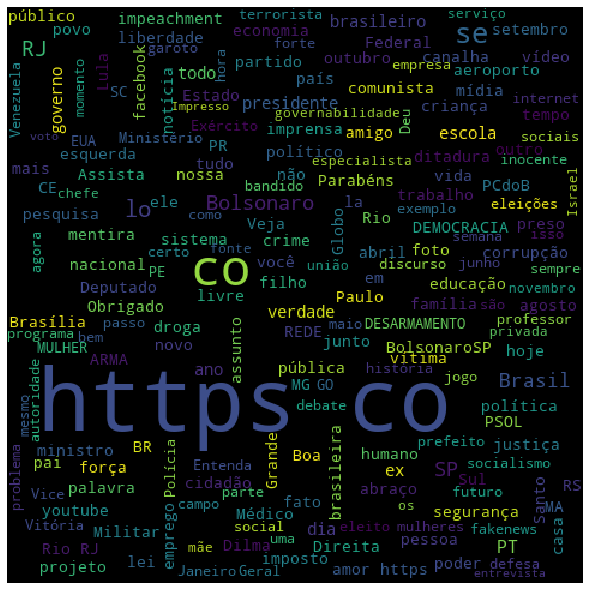

In [147]:
# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(nuvem_palavras)
 
# Display the generated image:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 
